In [15]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import plotly.plotly as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt

pd.options.display.max_columns = None

In [2]:
import plotly 
plotly.tools.set_credentials_file(username='max-farver', api_key='HbhTsxRXj15jBGOb2WXE')

In [3]:
df = pd.read_hdf('champ_clean_not_scaled.h5')

In [4]:
df = df.drop(['team', 'game_id'], axis=1)
df.head()

,game_duration,score,goals,assists,saves,shots,bpm,amount_collected,amount_collected_big_pads,amount_collected_small_pads,count_collected_big_pads,count_collected_small_pads,amount_stolen,amount_stolen_big_pads,amount_stolen_small_pads,count_stolen_big_pads,count_stolen_small_pads,0_boost_time,avg_speed,total_distance,time_slow_speed,time_boost_speed,time_supersonic_speed,time_on_ground,time_low_in_air,time_high_in_air,avg_distance_to_ball,avg_distance_to_ball_has_possession,avg_distance_to_ball_no_possession,time_behind_ball,time_in_front_of_ball,time_defensive_half,time_offensive_half,time_defensive_third,time_neutral_third,time_offensive_third,demos_inflicted,demos_taken,game_duration_diff,score_diff,goals_diff,assists_diff,saves_diff,shots_diff,bpm_diff,amount_collected_diff,amount_collected_big_pads_diff,amount_collected_small_pads_diff,count_collected_big_pads_diff,count_collected_small_pads_diff,amount_stolen_diff,amount_stolen_big_pads_diff,amount_stolen_small_pads_diff,count_stolen_big_pads_diff,count_stolen_small_pads_diff,0_boost_time_diff,avg_speed_diff,total_distance_diff,time_slow_speed_diff,time_boost_speed_diff,time_supersonic_speed_diff,time_on_ground_diff,time_low_in_air_diff,time_high_in_air_diff,avg_distance_to_ball_diff,avg_distance_to_ball_has_possession_diff,avg_distance_to_ball_no_possession_diff,time_behind_ball_diff,time_in_front_of_ball_diff,time_defensive_half_diff,time_offensive_half_diff,time_defensive_third_diff,time_neutral_third_diff,time_offensive_third_diff,demos_inflicted_diff,demos_taken_diff,win
0,458.0,554.000000,2.333333,2.000000,0.333333,4.000000,407.000000,2594.333333,1275.666667,1318.666667,29.000000,50.000000,554.000000,183.000000,371.000000,4.000000,12.000000,43.680000,1569.000000,562555.666667,172.870000,171.836667,55.246667,226.233333,156.923333,16.796667,3227.000000,3160.333333,3349.666667,299.103333,100.85,249.120000,150.833333,176.430000,128.640000,94.883333,0.333333,0.333333,0.0,223.666667,1.333333,1.333333,-1.000000,2.666667,76.666667,355.000000,423.666667,-68.666667,7.333333,-6.0,-232.333333,-42.666667,-189.666667,-2.333333,-8.666667,1.760000,122.333333,43895.666667,-38.663333,17.256667,21.443333,-18.923333,12.983333,5.976667,269.0,125.666667,469.333333,23.036667,-23.000000,-43.770000,43.810000,-45.39,0.35,45.073333,0.0,0.0,1
1,458.0,330.333333,1.000000,0.666667,1.333333,1.333333,330.333333,2239.333333,852.000000,1387.333333,21.666667,56.000000,786.333333,225.666667,560.666667,6.333333,20.666667,41.920000,1446.666667,518660.000000,211.533333,154.580000,33.803333,245.156667,143.940000,10.820000,2958.000000,3034.666667,2880.333333,276.066667,123.85,292.890000,107.023333,221.820000,128.290000,49.810000,0.333333,0.333333,0.0,-223.666667,-1.333333,-1.333333,1.000000,-2.666667,-76.666667,-355.000000,-423.666667,68.666667,-7.333333,6.0,232.333333,42.666667,189.666667,2.333333,8.666667,-1.760000,-122.333333,-43895.666667,38.663333,-17.256667,-21.443333,18.923333,-12.983333,-5.976667,-269.0,-125.666667,-469.333333,-23.036667,23.000000,43.770000,-43.810000,45.39,-0.35,-45.073333,0.0,0.0,0
2,393.0,293.000000,0.333333,0.333333,2.000000,1.333333,414.333333,2271.333333,1150.000000,1121.333333,16.666667,49.666667,456.333333,134.666667,321.666667,2.000000,13.666667,52.833333,1508.666667,468653.666667,163.346667,126.136667,46.946667,204.176667,123.816667,8.433333,2443.666667,2244.000000,2568.666667,221.570000,114.86,209.313333,127.120000,158.243333,99.946667,78.240000,0.333333,0.333333,0.0,-217.333333,-1.666667,-1.000000,1.666667,-3.333333,117.666667,635.666667,112.333333,523.333333,2.000000,16.0,132.333333,8.333333,124.000000,-1.000000,3.666667,18.090000,157.666667,54258.000000,-42.186667,17.320000,24.766667,-14.363333,16.350000,-2.093333,-479.0,-833.333333,-97.333333,-25.236667,25.130000,-18.726667,18.626667,-15.15,1.69,13.350000,0.0,0.0,0
3,393.0,510.333333,2.000000,1.333333,0.333333,4.666667,296.666667,1635.666667,1037.666667,598.000000,14.666667,33.666667,324.000000,126.333333,197.66666

In [5]:
# Use what we learned from feature selection

df = df[['score', 'game_duration', 'time_behind_ball_diff',
                        'saves', 'time_in_front_of_ball', 'time_defensive_half',
                        'time_on_ground', 'total_distance', 'time_low_in_air',
                        'time_neutral_third_diff', 'time_high_in_air_diff',
                        'time_defensive_third', 'avg_distance_to_ball_has_possession_diff',
                        'time_slow_speed', 'avg_distance_to_ball_no_possession',
                        'total_distance_diff', 'amount_collected_diff', 'time_behind_ball',
                        'win']]

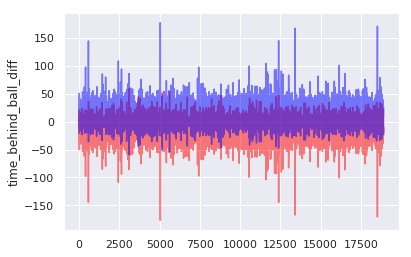

In [6]:
lose = df[df['win'] == 0]
win = df[df['win'] == 1]
sns.lineplot(x=lose.index, y=lose['time_behind_ball_diff'], legend='full', alpha=.5, color='red')
sns.lineplot(x=win.index, y=win['time_behind_ball_diff'], legend='full', alpha=0.5, color='blue')

# shows that there is a correlation between making sure you are behind the ball and winning

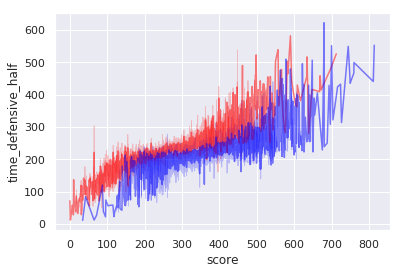

In [9]:
sns.lineplot(x=lose['score'], y=lose['time_defensive_half'], legend='full', alpha=.5, color='red')
sns.lineplot(x=win['score'], y=win['time_defensive_half'], legend='full', alpha=0.5, color='blue')

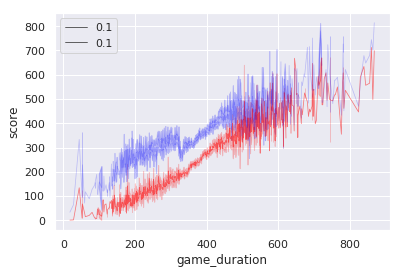

In [10]:
sns.lineplot(x=lose['game_duration'], y=lose['score'], legend='full', alpha=0.5, color='red', size=0.1)
sns.lineplot(x=win['game_duration'], y=win['score'], legend='full', alpha=0.2, color='blue', size=0.1)

188.4466666666667   --   220.48333333333335
187.48333333333335   --   220.085


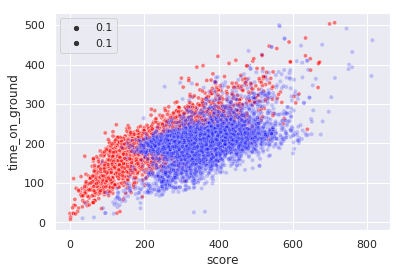

In [11]:
temp_win = win[win['time_on_ground'] != 0]
temp_lose = lose[lose['time_on_ground'] != 0]

sns.scatterplot(x=temp_lose['score'], y=temp_lose['time_on_ground'], legend='full', alpha=0.5, color='red', size=0.1)
sns.scatterplot(x=temp_win['score'], y=temp_win['time_on_ground'], legend='full', alpha=0.2, color='blue', size=0.1)

print(temp_win['time_on_ground'].quantile(.25), '  --  ', temp_win['time_on_ground'].quantile(.75))
print(temp_lose['time_on_ground'].quantile(.25), '  --  ', temp_lose['time_on_ground'].quantile(.75))

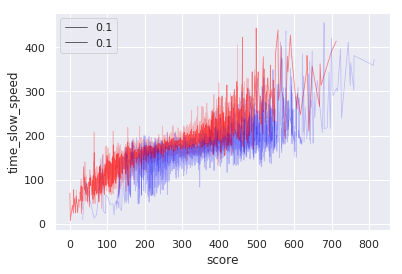

In [14]:
sns.lineplot(x=lose['score'], y=lose['time_slow_speed'], legend='full', alpha=0.5, color='red', size=0.1)
sns.lineplot(x=win['score'], y=win['time_slow_speed'], legend='full', alpha=0.2, color='blue', size=0.1)